# Week 3 - Lab 2 

## Loading Data with Pandas 

## A.) View the Data 

In [ ]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia340-2025-fall-67/Meteorite_Landings.csv') # load the data from s3
df.head() #show the top 5 rows; using tail shows the bottom 5 

In [10]:
df.shape #show the number of rows and columns and check the dataset size

(45716, 10)

In [11]:
df.info() # shows the data types and helps detect missing daa and confirm correct formats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [12]:
df.describe() #gives you a statitical summary 

,id,mass (g),year,reclat,reclong
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330


##### In my dataset there is 45716 rows and 10 columns. The columns include: name (object), id (interger), nametype (object), recclass (object), mass (g) (float), fall (object), year (float), reclat (float), reclong (float), geolocation (object). My first impression from viewing my data was how many meterorites have been recorded from NASA.

## B. Clean the Data 

In [33]:
#rename columns

df.rename(columns={"id": "ID"}, inplace=True) #rename id to ID
df.head()

,name,ID,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [20]:
#check for missing values with isnull(). sum()

total_missing = df.isnull().sum().sum()
print(f"Total missing values in the DataFrame: {total_missing}") #shows the number of rows containing null value 


Total missing values in the DataFrame: 0


In [17]:
#handle missing values with dropna()

df = df.dropna() #drop rows that contain missing data and prdouces a clean dataset 
df.isnull().sum()

name           0
id             0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

##### I renamed the id column to ID. In my dataset I have no missing values so I don't have to drop any of values. 

## C. Manipulate the Data 

In [7]:
#select a column 

df['mass (g)']

0            21.0
1           720.0
2        107000.0
3          1914.0
4           780.0
           ...   
45711       172.0
45712        46.0
45713         3.3
45714      2167.0
45715       200.0
Name: mass (g), Length: 45716, dtype: float64

In [22]:
#order rows by column values 

df.sort_values(by='mass (g)')[['mass (g)']] #sorting mass only column

,mass (g)
31064,0.0
31065,0.0
31066,0.0
31067,0.0
31068,0.0
...,...
3455,28000000.0
5370,30000000.0
5365,50000000.0
5373,58200000.0


In [30]:
#slice 5-10 rows

df.sort_values(by='mass (g)')[['mass (g)']][100:110] #show the rows 101 through 115 by sorted mass column


,mass (g)
21869,0.22
23458,0.22
15924,0.23
15836,0.23
38659,0.23
14006,0.23
39212,0.23
15838,0.24
22013,0.24
21868,0.24


In [21]:
#filter row with a condition 

df[df['mass (g)'] > 10000000][['mass (g)']] #shows onlu rows where mass is > 10000000

,mass (g)
920,23000000.0
3455,28000000.0
5016,22000000.0
5365,50000000.0
5370,30000000.0
5373,58200000.0
5468,24300000.0
12613,26000000.0
16392,60000000.0
22921,16000000.0


In [32]:
df['mass (g)'].max()#shows the max value of mass in the column 

60000000.0

##### I selected the mass column to further examine in my dataset because I wanted to see the distrubution of weight of meterorites. The output showed a variation of weight from 0g to 60,000,000g. I decided to sort mass by 10,000,000+.

## 3.) Explore and Clean Data 

In [36]:
sum_mass_by_year = df.groupby("year")["mass (g)"].sum() #aggregate the total mass per year
sum_mass_by_year.head()

year
860.0          472.0
1399.0      107000.0
1490.0         103.3
1491.0      127000.0
1575.0    50000000.0
Name: mass (g), dtype: float64

<Axes: xlabel='year'>

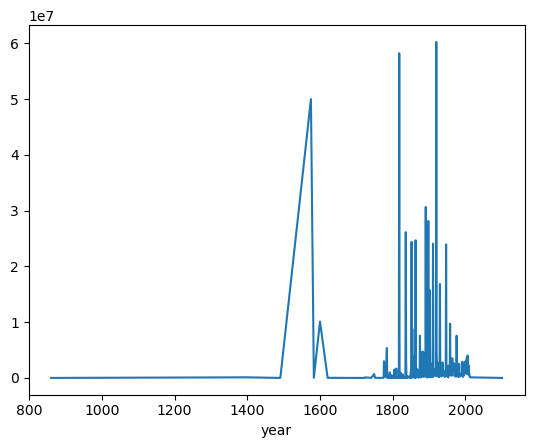

In [39]:
sum_mass_by_year.plot()